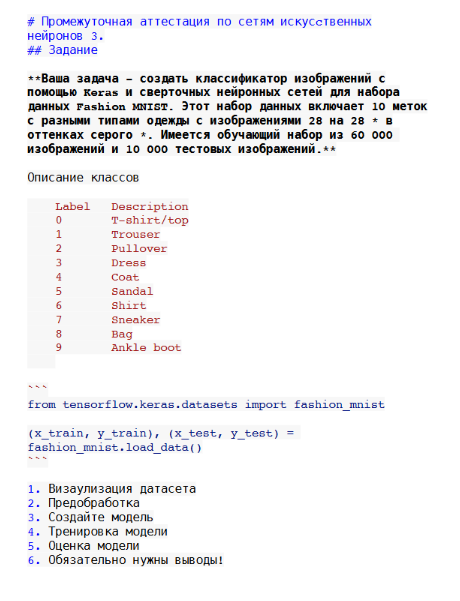



# Промежуточная аттестация по сетям искусственных нейронов 3.  
## Задание  

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 в оттенках серого. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**  

### Описание классов:
| Label | Description   |
|-------|---------------|
| 0     | T-shirt/top   |
| 1     | Trouser       |
| 2     | Pullover      |
| 3     | Dress         |
| 4     | Coat          |
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |
| 8     | Bag           |
| 9     | Ankle boot    |

```python
from tensorflow.keras.datasets import fashion_mnist
```




```python
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
```

1. Визуализация датасета  
2. Предобработка  
3. Создайте модель  
4. Тренировка модели  
5. Оценка модели  
6. Обязательно нужны выводы!  

---
---

# Импорт библиотек

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Загрузка набора данных Fashion MNIST

Набор данных включает в себя 60 000 изображений для обучения и 10 000 изображений для тестирования

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Выведем несколько объектов из датасета:

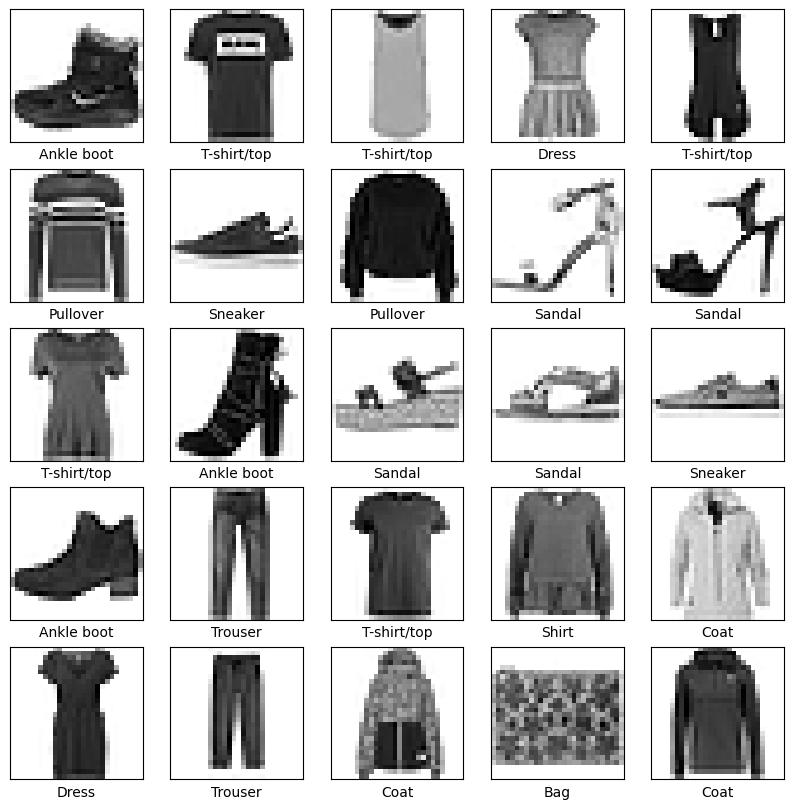

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Как видно из картинки выше, датасет состоит из одежды и их названий

# 2. Нормализация данных

Приведем значения пикселей изображений в диапазон от 0 до 1 для улучшения обучения нейронной сети

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# 3. Изменение формы изображений

Изображения в наборе данных имеют размер 28x28 пикселей и оттенки серого, добавим измерение для каналов (1)

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# 4. Определение классов

Дадим названия классам, соответствующих меткам в наборе данных (например, 0 - это "T-shirt/top")

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# 5. Создание сверточной нейронной сети

Начнем с создания пустой модели последовательного типа

In [ ]:
model = models.Sequential()

Добавим сверточный слой с 32 фильтрами размером 3x3 и функцией активации ReLU

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Добавим слой подвыборки (MaxPooling) с окном 2x2 для уменьшения размерности данных и предотвращения переобучения

In [ ]:
model.add(layers.MaxPooling2D((2, 2)))

Добавим второй сверточный слой с 64 фильтрами размером 3x3 и функцией активации ReLU

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Добавим второй слой подвыборки (MaxPooling) с окном 2x2

In [ ]:
model.add(layers.MaxPooling2D((2, 2)))

Добавим третий сверточный слой с 64 фильтрами размером 3x3 и функцией активации ReLU

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 6. Добавление полносвязных слоев

Преобразуем выходные данные из двумерного вида в одномерный (Flatten)

In [ ]:
model.add(layers.Flatten())

Добавим полносвязный слой с 64 нейронами и функцией активации ReLU

In [ ]:
model.add(layers.Dense(64, activation='relu'))

Добавим выходной слой с 10 нейронами (по количеству классов) и функцией активации softmax для предсказания вероятностей классов

In [ ]:
model.add(layers.Dense(10, activation='softmax'))

# 7. Компиляция модели

Используем оптимизатор Adam, функцию потерь sparse_categorical_crossentropy и метрику точности

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 8. Обучение модели

Обучаем модель на обучающих данных в течение 10 эпох, также используем тестовые данные для валидации

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.7425 - loss: 0.7020 - val_accuracy: 0.8626 - val_loss: 0.3764
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.8768 - loss: 0.3349 - val_accuracy: 0.8865 - val_loss: 0.3129
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8968 - loss: 0.2760 - val_accuracy: 0.8897 - val_loss: 0.3013
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9071 - loss: 0.2525 - val_accuracy: 0.9049 - val_loss: 0.2643
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9188 - loss: 0.2182 - val_accuracy: 0.9027 - val_loss: 0.2694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9257 - loss: 0.2027 - val_accuracy: 0.9015 - val_loss: 0.2722
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9324 - loss: 0.1827 - val_accuracy: 0.9057 - val_loss: 0.2749
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9365 -

# 9. Оценка точности модели на тестовых данных

Оценим точность модели на тестовом наборе данных

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочность на тестовых данных: {test_acc * 100:.2f}%')

313/313 - 4s - 12ms/step - accuracy: 0.9092 - loss: 0.2788

Точность на тестовых данных: 90.92%


Точность модели составляет 91%, возможно, модель переобучена.

# 10. Визуализация точности и ошибки во время обучения

Строим график изменения точности на обучающем и проверочном наборах данных

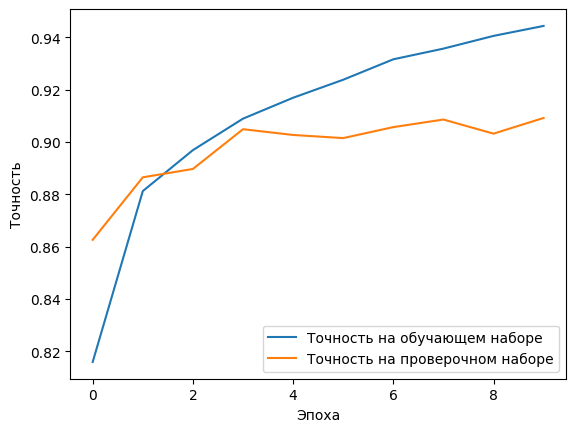

In [ ]:
plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Точность на проверочном наборе')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.show()

На графике заметно, что точность на обучающих данных продолжает расти, в то время как точность на проверочных данных либо стабилизируется, либо незначительно снижается. Это свидетельствует о том, что модель начинает "запоминать" данные вместо того, чтобы учиться обобщать, что говорит о ее переобучении.

# 11. Предсказание на тестовых изображениях

Выполним предсказание классов для первых 5 изображений из тестового набора

In [ ]:
y_pred = model.predict(test_images[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Вывод предсказаний и соответствующих изображений

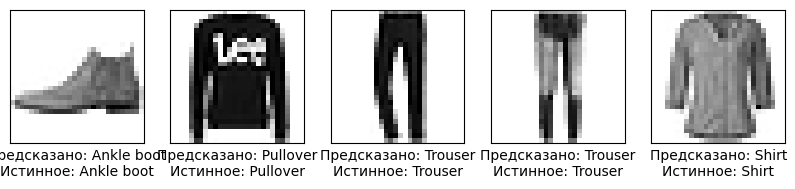

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = class_names[tf.argmax(y_pred[i]).numpy()]
    true_label = class_names[test_labels[i]]
    plt.xlabel(f"Предсказано: {predicted_label}\nИстинное: {true_label}")
plt.show()

Модель успешно сделала предсказания, без ошибок.